In [280]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 读取数据

In [281]:
x_s=pd.read_excel(io='Molecular_Descriptor.xlsx')
print(x_s.shape)
x_s.head()

(1974, 730)


SMILES  nAcid   ALogP    ALogp2  \
0  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...      0 -0.2860  0.081796   
1  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...      0 -0.8620  0.743044   
2  Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...      0  0.7296  0.532316   
3  Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...      0 -0.3184  0.101379   
4  Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...      0  1.3551  1.836296   

        AMR       apol  naAromAtom  nAromBond  nAtom  nHeavyAtom  ...  \
0  126.1188  74.170169          12         12     64          31  ...   
1  131.9420  80.357341          12         12     70          33  ...   
2  139.9304  74.064997          18         18     62          33  ...   
3  133.4822  80.357341          12         12     70          33  ...   
4  143.1903  76.356583          18         18     64          33  ...   

           MW     WTPT-1    WTPT-2     WTPT-3     WTPT-4    WTPT-5  WPATH  \
0  439.218115  64.771680  2.089409  15.471445   8.858910  3.406628   3011   
1  467.249415  68.960024  2.089698  15.486947   8.863774  3.406648   3516   
2  463.181729  68.748923  2.083301  18.011114  11.390412  3.406644   3542   
3  467.249415  68.883696  2.087385  15.468365   8.857943  3.406624   3594   
4  461.202465  68.883696  2.087385  15.468365   8.857943  3.406624   3594   

   WPOL  XLogP  Zagreb  
0    47  4.666     166  
1    54  5.804     174  
2    52  2.964     176  
3    50  6.015     174  
4    50  4.462     174  

[5 rows x 730 columns]

In [282]:
y_s=pd.read_excel(io='ERα_activity.xlsx')
y_s.head()

SMILES  IC50_nM     pIC50
0  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...      2.5  8.602060
1  Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...      7.5  8.124939
2  Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...      3.1  8.508638
3  Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...      3.9  8.408935
4  Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...      7.4  8.130768

In [283]:
#复制原数据
x=copy.deepcopy(x_s).iloc[:,1:]
y=copy.deepcopy(y_s).iloc[:,-1]
print(x.shape,y.shape)
x=x.iloc[:,1:]

(1974, 729) (1974,)


### 观察各特征与PIC50的对应关系

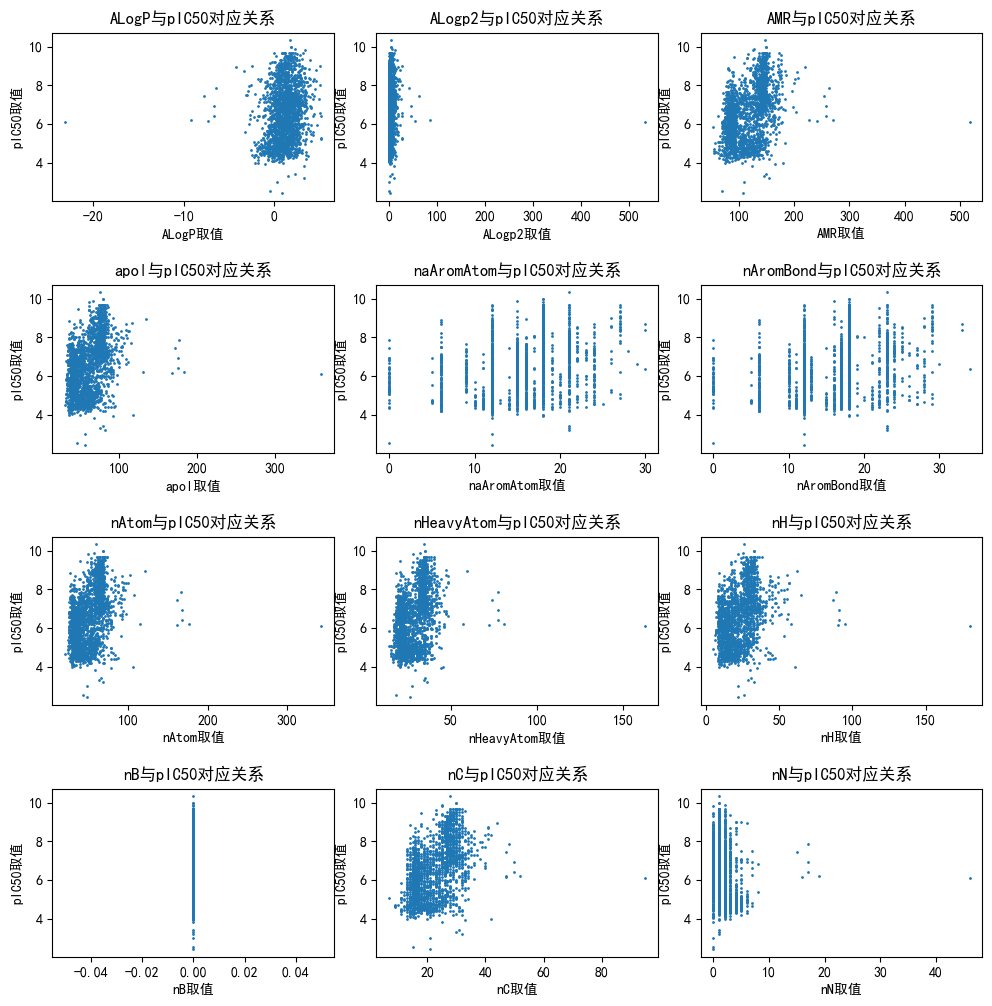

In [284]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.5)
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.scatter(x.iloc[:,i],y,s=1)
    plt.ylabel("pIC50取值")
    plt.xlabel(list(x)[i]+"取值")
    plt.title(list(x)[i]+"与pIC50对应关系")

### 去除低方差

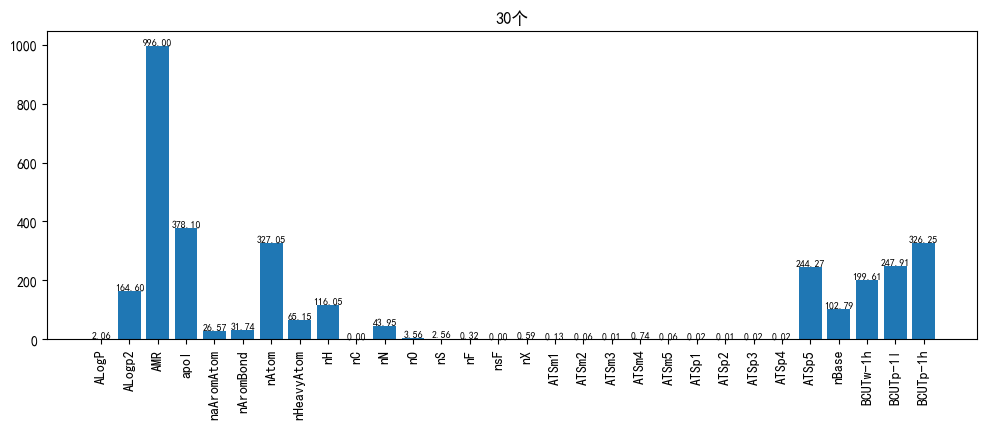

In [285]:
import sklearn.feature_selection as fs

s_model=fs.VarianceThreshold(threshold=0.2)
s_model.fit(x)
x=s_model.transform(x)

#画一下图
label=[]
for i in range(x.shape[1]):
    for key in x_s:
        a=np.array(x[:,i])
        b=np.array(x_s[key])
        if(np.array_equal(a,b)):
            label.append(key)
variance=s_model.variances_
plt.figure(figsize=(12,4))
plt.bar(label[:30],variance[:30])
plt.xticks(rotation=90)
plt.title("30个")
for a,b in zip(label[:30],variance[:30]):   #柱子上的数字显示
    plt.text(a,b,'%.2f'%b,ha='center',va='bottom',fontsize=7)
plt.show()
print(min(variance))


### 使用随机森林进行特征选择

In [286]:
from sklearn import tree
onethree=tree.DecisionTreeRegressor()
onethree=onethree.fit(x,y)
feature_important=onethree.feature_importances_
feature_important.shape

(300,)

In [287]:
#获取最重要的前三十个的数组
##排序返回从小到大的下标
feature_important_index=feature_important.argsort()
x_thrity=x[:,feature_important_index[-30:]]
pd.DataFrame(x_thrity).head()

0          1    2         3        4    5          6    7    8   \
0  6.050188  58.060335  1.0  9.019729  5.26590  0.0  15.471445  2.0  0.0   
1  6.083246  60.060335  1.0  9.255431  5.26590  0.0  15.486947  2.0  0.0   
2  6.020424  60.392427  1.0  9.760737  7.46270  1.0  18.011114  2.0  0.0   
3  6.071897  57.728243  1.0  8.706054  5.26590  0.0  15.468365  2.0  0.0   
4  6.046045  57.728243  1.0  8.706054  7.24809  0.0  15.468365  2.0  0.0   

         9   ...         20        21   22     23        24     25        26  \
0 -1.331303  ...   9.968948  0.469126  0.0  2.288 -1.331303  67.23  6.593009   
1 -1.378628  ...  10.058948  0.449126  0.0  2.288 -1.378628  67.23  6.674642   
2 -1.608354  ...  19.730394  0.997247  0.0  2.901 -1.608354  87.46  6.502751   
3 -1.350874  ...  10.025028  0.456486  0.0  2.288 -1.350874  67.23  6.622142   
4 -1.449689  ...   9.993342  0.473631  0.0  2.603 -1.449689  67.23  6.552810   

    27         28         29  
0  0.0   9.968948  28.277932  
1  0.0  10.058948  31.076748  
2  0.0   9.752886  30.901064  
3  0.0  10.025028  30.570001  
4  0.0   9.993342  30.570001  

[5 rows x 30 columns]

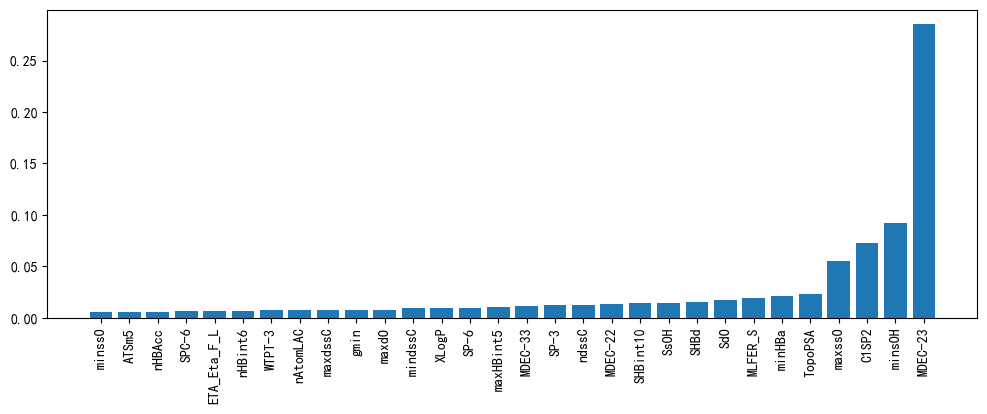

In [288]:
#找到这30列是对应的哪些化合物
label_thrity=[]
for i in range(x_thrity.shape[1]):
    for key in x_s:
        a=np.array(x_thrity[:,i])
        b=np.array(x_s[key])
        if(np.array_equal(a,b)):
            label_thrity.append(key)
plt.figure(figsize=(12,4))
plt.bar(label_thrity,feature_important[feature_important_index][-30:])
plt.xticks(rotation=90)
plt.show()

### 使用皮埃尔相关系数计算30个特征加一个plC50

In [289]:
piaier=x_s[label_thrity]
label_thrity.append('plC50')
piaier=np.concatenate((np.array(piaier),y[:,np.newaxis]),axis=1)
piaier=pd.DataFrame(piaier,columns=label_thrity).corr()
display(piaier)

C:\TempFiles\ipykernel_15732\3909936530.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  piaier=np.concatenate((np.array(piaier),y[:,np.newaxis]),axis=1)


minssO     ATSm5    nHBAcc     SPC-6  ETA_Eta_F_L   nHBint6  \
minssO       1.000000  0.308179 -0.066805  0.115797     0.386184 -0.035601   
ATSm5        0.308179  1.000000  0.524647  0.675041     0.600251  0.467893   
nHBAcc      -0.066805  0.524647  1.000000  0.289576     0.388890  0.720623   
SPC-6        0.115797  0.675041  0.289576  1.000000     0.299503  0.214483   
ETA_Eta_F_L  0.386184  0.600251  0.388890  0.299503     1.000000  0.288365   
nHBint6     -0.035601  0.467893  0.720623  0.214483     0.288365  1.000000   
WTPT-3       0.192907  0.674173  0.828371  0.271927     0.622264  0.657462   
nAtomLAC     0.186138  0.271658  0.124066  0.075372     0.119884  0.074109   
maxdssC     -0.008148  0.075192 -0.027865  0.231058    -0.142126 -0.119850   
gmin        -0.084747 -0.386467 -0.229353 -0.259811    -0.274166 -0.095129   
maxdO       -0.014303  0.247920  0.410330  0.235804     0.154167  0.136835   
mindssC      0.013181 -0.076111 -0.274426  0.024407    -0.220855 -0.182339   
XLogP        0.110249  0.149312 -0.247959  0.180145    -0.004110 -0.154622   
SP-6         0.373596  0.728965  0.260555  0.806504     0.613632  0.179621   
maxHBint5    0.089322  0.070864  0.150142  0.005260     0.064784  0.198460   
MDEC-33      0.396701  0.420421 -0.103905  0.521743     0.416109 -0.085212   
SP-3         0.406173  0.807930  0.455409  0.706108     0.729608  0.357215   
ndssC        0.028882  0.442554  0.647762  0.357513     0.268697  0.503130   
MDEC-22      0.238352  0.270363 -0.070276  0.253354     0.363005 -0.056112   
SHBint10     0.015844  0.301109  0.195056  0.195373     0.267590  0.390646   
SsOH         0.061505  0.013350 -0.373188  0.130573     0.033568  0.006334   
SHBd        -0.078136  0.304821  0.454618  0.117154     0.302203  0.759471   
SdO         -0.017518  0.528611  0.823389  0.345374     0.345198  0.642857   
MLFER_S      0.239572  0.663261  0.735578  0.319370     0.767349  0.629191   
minHBa      -0.275126 -0.336020 -0.296891  0.011758    -0.407965 -0.108575   
TopoPSA      0.071144  0.558374  0.808902  0.206386     0.468542  0.783724   
maxssO       0.996300  0.324502 -0.068137  0.127720     0.404613 -0.037807   
C1SP2       -0.118580  0.251292  0.760050  0.032888     0.252362  0.506210   
minsOH       0.132199 -0.010348 -0.446939  0.102054    -0.008999 -0.040993   
MDEC-23      0.384934  0.450081 -0.115243  0.488091     0.599652 -0.143442   
plC50        0.211172  0.250606 -0.259475  0.201873     0.253043 -0.011864   

               WTPT-3  nAtomLAC   maxdssC      gmin  ...      SHBd       SdO  \
minssO       0.192907  0.186138 -0.008148 -0.084747  ... -0.078136 -0.017518   
ATSm5        0.674173  0.271658  0.075192 -0.386467  ...  0.304821  0.528611   
nHBAcc       0.828371  0.124066 -0.027865 -0.229353  ...  0.454618  0.823389   
SPC-6        0.271927  0.075372  0.231058 -0.259811  ...  0.117154  0.345374   
ETA_Eta_F_L  0.622264  0.119884 -0.142126 -0.274166  ...  0.302203  0.345198   
nHBint6      0.657462  0.074109 -0.119850 -0.095129  ...  0.759471  0.642857   
WTPT-3       1.000000  0.093307 -0.143677 -0.413485  ...  0.498449  0.703374   
nAtomLAC     0.093307  1.000000  0.147745 -0.054471  ...  0.077124  0.113845   
maxdssC     -0.143677  0.147745  1.000000  0.114390  ... -0.140671  0.006865   
gmin        -0.413485 -0.054471  0.114390  1.000000  ... -0.055878 -0.420827   
maxdO        0.292503  0.059454  0.064595 -0.350255  ...  0.009098  0.686807   
mindssC     -0.270178  0.005803  0.570391  0.246426  ... -0.207122 -0.376104   
XLogP       -0.293713  0.595703  0.209129  0.112820  ... -0.201631 -0.266745   
SP-6         0.383494  0.203433  0.192295 -0.152856  ...  0.114398  0.205129   
maxHBint5    0.215061 -0.088406 -0.171779  0.000873  ...  0.280551  0.199238   
MDEC-33      0.119826 -0.038052  0.105495 -0.044944  ...  0.055797  0.036156   
SP-3         0.579860  0.310304  0.098476 -0.212980  ...  0.235003  0.370978   
ndssC        0.502579  0.169603  0.500034 -0.081501  ...  0.336974  0.731641  

In [290]:
plt.figure(figsize=(20,20),dpi=600)
sns.heatmap(piaier,annot=True,vmax=1,square=True,cmap="Blues_r")
plt.show()

然后从这30个分子挑选出与plC50相关性强，但与其他分子相关性弱的分析

In [291]:
sort_correlation=piaier['plC50'].abs().sort_values(ascending=False)

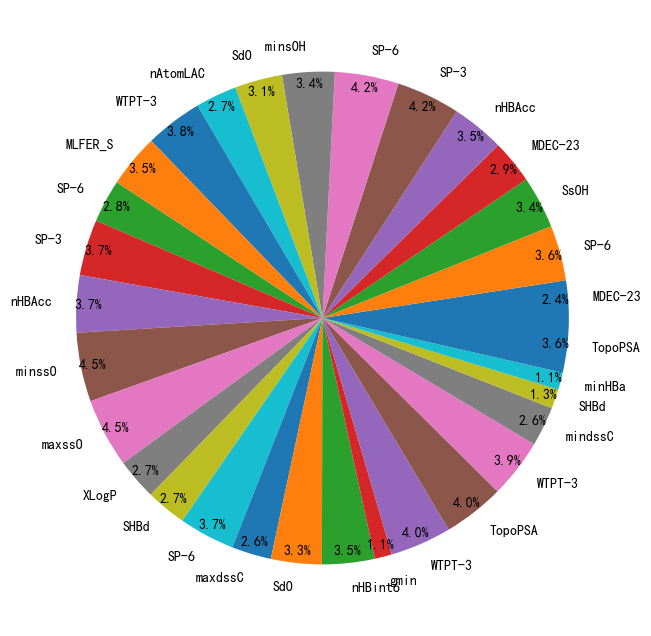

In [292]:
#最终筛选出分子
max_molecule=[]
for key,value in sort_correlation.iteritems():
    maxKey=''
    maxValue=0
    for i,j in piaier[key].iteritems():
        if i!=key:
            if maxValue<j:
                maxKey=i
                maxValue=j
    max_molecule.append([maxKey,maxValue])
max_molecule=pd.DataFrame(max_molecule)
# print(max_molecule.shape)
plt.figure(figsize=(8,8))
plt.pie(max_molecule.iloc[:,1],labels=max_molecule.iloc[:,0],autopct="%.1f%%",pctdistance=0.95)
plt.show()
# print(sort_correlation)

In [293]:
twinty_molecule=[
    'MDEC-23',
    'minsOH',
    'BCUTp-1h',
    'C1SP2',
    'maxdO',
    'XLogP',
    'ATSm5',
    'maxHBd',
    'maxssO',
    'SHBint10',
    'SPC-6',
    'BCUTp-1l',
    'maxsF',
    'minHBa',
    'MDEO-12',
    'ATSc5',
    'maxHBint5',
    'ATSc1',
    'gmin',
    'SHBint7'
]

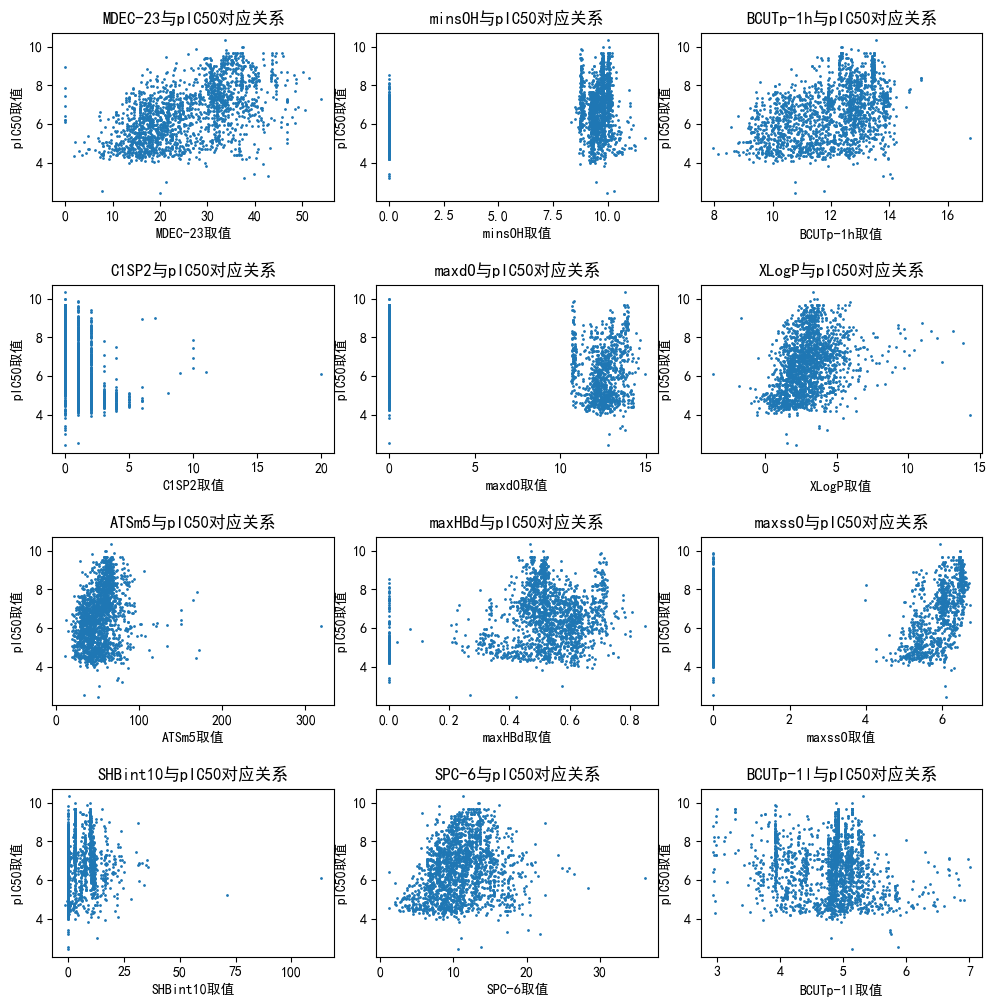

In [294]:
x=x_s[twinty_molecule]
plt.figure(figsize=(12,12))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.15,hspace=0.5)
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.scatter(x.iloc[:,i],y,s=1)
    plt.ylabel("pIC50取值")
    plt.xlabel(list(x)[i]+"取值")
    plt.title(list(x)[i]+"与pIC50对应关系")